The goal of this project is to analize the data set in the file "house.csv". There are two major parts: 1) predicting continuous"price" variable based on all other variables. 2) predicting "price_bin" variable that represents if the price of a given property is above or below 1 mln

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

# Seting the style of the notebook
sns.set_style('whitegrid')

# creating and displaying the head of the dataframe
original = pd.read_csv('house.csv')

original.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# As it can be seen there are all sorts continuous and descrete variables such as numbers of floors
# and bathrooms characterising each property

# id is recorded identification code that was used while compiling the database
# date is date when price was recorded
original.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 1. Prediction of continuous price

In [3]:
good_features = original.drop(['price_bin'], axis = 1)
# Throwing out price_bin variable
good_features.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


There is an argument as to weather to throw out the "id" variable from the dataset as it logically shouldn't have much to do with the price of the property. Sine tree based methods are going to be predominantly used for prediction, additional variables shouldn't be a problem, since if they don't predict price in any real maner they just won't be chosen on splits, the only consiquence of leaving them in the data set will be that algorithms will take a bit longer.

In [4]:
# transforming the date variable to be usable by the algorithms. Now it represents number of days since first day 
# of recording the data

dates = (original['date'].apply(lambda x: datetime(year=int(x.split('T')[0][0:4]), month=int(x.split('T')[0][4:6]),day=int(x.split('T')[0][6:8]))))
mindate = min(dates)
dates = dates.apply(lambda x:(x - mindate).days)
good_features['date'] = dates

In [5]:
good_features.head() # This is how the head of the DF looks now

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = good_features.drop('price', axis = 1)
y = good_features['price']

In [8]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 420)

After trying several regressors I came to the conclusion that tree based methods show the best results in predicting the price

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rfr = RandomForestRegressor(n_estimators = 200)

In [11]:
rfr.fit(X = X_train, y = y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
from sklearn import metrics

In [13]:
predictions = rfr.predict(X_test)

In [14]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(predictions, y_test)))
print ('Explained variance', metrics.explained_variance_score(predictions, y_test))

RMSE  129068.7958510357
Explained variance 0.8649919047882046


As it can be seen the explained variance is already pretty high, and the prediction ability is already pretty good as can be seen from the scatter plot below

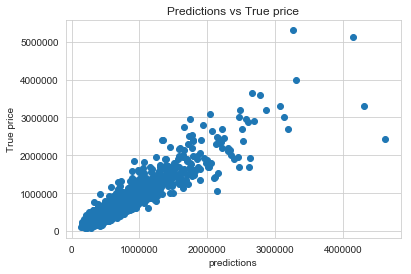

In [15]:
plt.title('Predictions vs True price')
plt.xlabel('predictions')
plt.ylabel('True price')
plt.scatter(x = predictions,y = y_test)

Next let's pay attention to Explained Varience result and try to improve that. The value above is our reference score

In the attempts to improve the model I have decided to use state of the art version of random forests that is called **Extreme Gradient Boosting**, and is implemented in the module calles xgboost

In [16]:
import xgboost as xgb

In [17]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200)

In [18]:
xg_reg.fit(X_train,y_train)

preds_xgb = xg_reg.predict(X_test)

C:\ProgramData\Anaconda3\envs\reports_stuff\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [19]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(preds_xgb, y_test)))
print ('Explained variance', metrics.explained_variance_score(preds_xgb, y_test))

RMSE  128095.36080623821
Explained variance 0.8730667512460615


As it can be seen the explained variance is already somewhat improved by using XGBoost

### Search for the right hyperparemeters

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
# Parameters to be randomly sampled by RandomizedSearchCV

params = {
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

In [22]:
xgb_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100)

folds = 5

In [23]:
# Searching in hyperparameter space is only done in training set, using cross validation. X_test from
# X_test is used as a validation set after choosing the hyper parameters

random_search = RandomizedSearchCV(estimator=xgb_reg2, param_distributions=params, scoring='explained_variance',
                                   n_jobs=-1, cv=folds, verbose=1, refit=True, n_iter= 20, random_state=42)

In [24]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
C:\ProgramData\Anaconda3\envs\reports_stuff\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [25]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score:')
print(random_search.best_score_ )
print('\n Best parameters:')
print(random_search.best_params_)


 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

 Best score:
0.8879159097004005

 Best parameters:
{'subsample': 0.8, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1}


In [26]:
xgb_reg3 = xgb.XGBRegressor(objective ='reg:squarederror',
                            gamma=random_search.best_params_['gamma'], learning_rate = random_search.best_params_['learning_rate'],
                            max_depth = random_search.best_params_['max_depth'],subsample = random_search.best_params_['subsample'], 
                            n_estimators = 200)

Training the best model on a higher number of estimators

In [27]:
xgb_reg3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [28]:
predictions_refit = xgb_reg3.predict(X_test)
preds_best = random_search.best_estimator_.predict(X_test)

In [29]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(predictions_refit, y_test)))
print ('Refited Explained variance', metrics.explained_variance_score(predictions_refit, y_test))

RMSE  119166.68104384727
Refited Explained variance 0.8933260551945663


As can be seen tuning of the hyper parameters gave an increase of several percentages of explained variance

## 2. Prediction of "price_bin" variable

In this chapter the "price_bin" binary variable will be predicted. It is a variable with highly unbalanced classes. Number of "0"s is much higher than number of "1"s. This issue will be adressed a bit later

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
import warnings
warnings.filterwarnings('ignore')

There are a lot of different methods to classify a variable. Such as logistic regression, Support Vector Machines and Bayes classifiers. Since XGBoost showed such a good result in the regression section, it is going to be used here as well. 

In [32]:
# hyper parameteters of XGBoost
params_class = {
        'scale_pos_weight': [1, 2, 5, 10, 15],
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

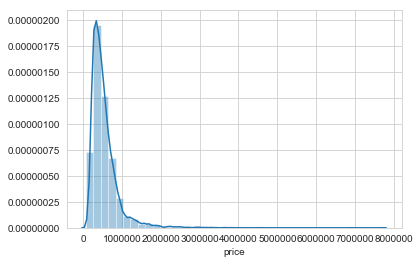

In [33]:
# Showing the imbalanced distribution of prices ( most of them are less than 1$ mln )

sns.distplot(a = (good_features['price']), bins = 40)

In [34]:
X = good_features.drop(['price'],axis = 1) # Throwing out continuous price column
y = original['price_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
xgb_class = XGBClassifier(objective='binary:logistic', nthread=-1, n_estimators=40)

folds = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001) # using stratified k fold, because of class imbalance

random_search_class = RandomizedSearchCV(estimator=xgb_class, param_distributions=params_class,n_iter= 20,
                                         scoring='f1',refit=True, cv=skf.split(X_train,y_train), verbose=1, 
                                         random_state=42)

In [36]:
random_search_class.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000025D095A43B8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=40,
                                           n_jobs=1, nthread=-1,
                                           objective='binary:log...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'gamma

In [37]:
print('\n Best estimator:')
print(random_search_class.best_estimator_)
print('\n Best score:')
print(random_search_class.best_score_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.4, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=0.8, verbosity=1)

 Best score:
0.813523544799026


In [38]:
class_preds = random_search_class.best_estimator_.predict(X_test)

In [39]:
print ('confusion matrix: \n', confusion_matrix(y_test, class_preds))

confusion matrix: 
 [[2954   48]
 [  68  172]]


In [40]:
print ('classification report: \n', classification_report(y_test, class_preds))

classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3002
           1       0.78      0.72      0.75       240

    accuracy                           0.96      3242
   macro avg       0.88      0.85      0.86      3242
weighted avg       0.96      0.96      0.96      3242



*Note: scale_pos_weight parameter can be used to tune the number of points that will be classified as "1". This means that in some sence there will be a trade-off between precision and recall in "1" class*

In order to adress this issue of imbalanced classes in a different way, several methods can be used. Undersampling "0" class in the training set is one of them. 
*Note: in case it is very important for classification to always identify class "1" correctly such method can be used*

**Undersampling**, is a method in which only a subset of the majority class is used to train the model

In [41]:
from imblearn.under_sampling import ClusterCentroids

In [42]:
cc = ClusterCentroids(random_state=42)
X_under, y_under = cc.fit_resample(X_train, y_train)

In [43]:
print ('licaba wbisów z "0"', len(y_under)-sum(y_under))
print ('liczba wpisów z "1"', sum(y_under))

licaba wbisów z "0" 1225
liczba wpisów z "1" 1225


After undersampling the number of "1" and "0" in u_under is the same

In [44]:
# hyper parameteters of XGBoost
params_under = {
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

In [45]:
random_search_under = RandomizedSearchCV(estimator=xgb_class, param_distributions=params_under,n_iter= 20,
                                         scoring='f1',refit=True, cv=skf.split(X_under,y_under), verbose=1, 
                                         random_state=42)

In [46]:
random_search_under.fit(X_under, y_under)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.4s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000025D1212A728>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=40,
                                           n_jobs=1, nthread=-1,
                                           objective='binary:log...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [47]:
print('\n Best estimator:')
print(random_search_under.best_estimator_)
print('\n Best score:')
print(random_search_under.best_score_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

 Best score:
0.9861750808938116


In [48]:
class_preds_under = random_search_under.best_estimator_.predict(X_test)

In [49]:
print ('confusion matrix: \n', confusion_matrix(y_test, class_preds_under))

confusion matrix: 
 [[2250  752]
 [   4  236]]


In [50]:
print ('classification report: \n', classification_report(y_test, class_preds_under))

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86      3002
           1       0.24      0.98      0.38       240

    accuracy                           0.77      3242
   macro avg       0.62      0.87      0.62      3242
weighted avg       0.94      0.77      0.82      3242



As can be seen the recall value got much better for class 1, while precision for 1 and recall for 0 got much worse. This examplifies the trade-off. Depening on what is the goal of classification, different strategies will show the best result.

### Conclusions

This project is about analyzing the data concerning house prices stored in the file "house.csv" in the repository. Several models were built in order to predict continuous "price" and binary "price_bin" variables. The best result for a regression was achieved by using XGBoost library. Explained variance in the best model was around **0.9**.
There are several ways in which the given result could be improved. One is to generate new features for machine leaning algorithm. For example a geographycal feature can be constructed based on "lat" and "long" columns. Other regression methods that aren't based on Decision trees may be tested as well.

As far as prediction of "price_bin" column, XGBoost was used as well. Best score as measured by f1 metric was **0.86** or as measured by weighted f1 metric: **0.96**. The result of classification is based on the goal of classification and importance of specific metrics, be it precision, or recall of a certain class. There are many other available methods that can be used for classification that can potentially give a better result.